<a href="https://colab.research.google.com/github/kathylsm25/CienciaDeDatosConPython/blob/main/Proyecto_No_3_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto No. 3
Por: Katherine Serrano
Curso: Ciencia de Datos con Python desde cero

In [1]:
# Importamos variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore




# Notebook 1

REALIZAR:

Generar nuevas variables de valor(De ser necesario) 
1er notebook:Análisis Exploratorio de datos(EDA)-Estadística Descriptiva;Incluir la generación de nuevas variables de valor.

In [2]:
# Cargamos la Data desde Nuestra PC
from google.colab import files
files.upload()

Saving Data_Nutricion_grupos.csv to Data_Nutricion_grupos.csv


{'Data_Nutricion_grupos.csv': b'\xef\xbb\xbfIndividuo;talla;edad;peso_kg;circun_cuello;IMC;circun_cintura;cadera;ind_cintura_cadera;ind_cintura_estatura;por_grasa_corporal;masa_corporal_magra_kg;pliegue_cutaneo_BICEPS;pliegue_cutaneo_TRICEPS;pliegue_cutaneo_ESCAPULAR;pliegue_cutaneo_SUPRAILIACO;Grupos\r\nPersona 1;155.7;16;71.2;35.7;29.58;90;98;0.92;0.58;36.45;45.25;13;27;32;34;A\r\nPersona 2;166.5;16;61;31.8;22.36;80.9;100.5;0.80;0.49;28.79;43.44;5;19;15;22;A\r\nPersona 3;151.3;16;49.1;30.5;21.62;72;86;0.84;0.48;29.87;34.44;13;18;18;17;A\r\nPersona 4;151.7;16;54.6;32.6;23.12;;88.4;0.84;0.49;27.87;39.38;5;19;15;18;A\r\nPersona 5;160.3;16;58;30.1;22.26;;97.9;0.81;;30.28;40.44;10;19;20;19;A\r\nPersona 6;162.4;16;70.8;33.9;26.12;86.5;106.1;0.82;0.53;31.44;48.54;11;25;18;20;A\r\nPersona 7;167;16;47.4;30.5;17.32;66.7;81.5;;0.40;9.69;42.81;3.5;7;6;6;A\r\nPersona 8;158.7;16;49.3;31.2;18.98;69.3;83.2;0.83;0.44;;41.24;5.5;12;10.5;11.5;A\r\nPersona 9;158.2;16;91;37.5;35.52;107.5;116;0.93;0.68;34

In [3]:
# Cargamos los datos desde un archivo csv
df_nutricion = pd.read_csv('Data_Nutricion_grupos.csv', sep=';')
df_nutricion.head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,28.79,43.44,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.12,NaN,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.26,NaN,97.9,0.81,NaN,30.28,40.44,10.0,19.0,20.0,19.0,A


In [25]:
# Varificamos si tenemos datos en blanco 
df_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    float64
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [24]:
# Imputamos los valores faltantes de la columna "por_grasa_corporala" por la mediana
# Calcular la moda de la variable "talla"
mediana_por_grasa_corporal = df_nutricion['por_grasa_corporal'].median()

# Imputar los valores faltantes con la moda
df_nutricion['por_grasa_corporal'].fillna(mediana_por_grasa_corporal, inplace=True)

In [26]:
# Imputamos los valores faltantes de la columna "ind_cintura_estatura" por la mediana
# Calcular la moda de la variable "talla"
mediana_ind_cintura_estatura = df_nutricion['ind_cintura_estatura'].median()

# Imputar los valores faltantes con la moda
df_nutricion['ind_cintura_estatura'].fillna(mediana_ind_cintura_estatura, inplace=True)

In [27]:
# Imputamos los valores faltantes de la columna "ind_cintura_cadera" por la mediana
# Calcular la moda de la variable "talla"
mediana_ind_cintura_cadera = df_nutricion['ind_cintura_cadera'].median()

# Imputar los valores faltantes con la moda
df_nutricion['ind_cintura_cadera'].fillna(mediana_ind_cintura_cadera, inplace=True)

In [28]:
# Imputamos los valores faltantes de la columna "circun_cintura" por la mediana
# Calcular la moda de la variable "talla"
mediana_circun_cintura = df_nutricion['circun_cintura'].median()

# Imputar los valores faltantes con la moda
df_nutricion['circun_cintura'].fillna(mediana_circun_cintura, inplace=True)

In [29]:
# Imputamos los valores faltantes de la columna "circun_cintura" por la mediana
# Calcular la moda de la variable "talla"
mediana_circun_cuello = df_nutricion['circun_cuello'].median()

# Imputar los valores faltantes con la moda
df_nutricion['circun_cuello'].fillna(mediana_circun_cuello, inplace=True)

In [19]:
# Imputamos los valores faltantes de la columna "cadera" por la mediana
# Calcular la moda de la variable "talla"
mediana_cadera = df_nutricion['cadera'].median()

# Imputar los valores faltantes con la moda
df_nutricion['cadera'].fillna(mediana_cadera, inplace=True)

In [5]:
# Imputamos los valores faltantes de la columna "edad" por la mediana
mediana_edad = df_nutricion["edad"].median()
print (mediana_edad)
df_nutricion["edad"].fillna(mediana_edad, inplace=True)

15.0


In [7]:
# Imputamos los valores faltantes de la columna "masa_corporal_magra_kg" por la media
media_masa = df_nutricion["masa_corporal_magra_kg"].mean()
print(media_masa)
df_nutricion["masa_corporal_magra_kg"].fillna(media_masa, inplace=True)

43.37953703703703


In [9]:
# Imputamos los valores faltantes de la columna "peso_kg" por la mediana
mediana_peso = df_nutricion["peso_kg"].median()
print(mediana_peso)
df_nutricion["peso_kg"].fillna(mediana_peso, inplace=True)

55.8


In [11]:
# Imputamos los valores faltantes de la columna "talla" por la moda
# Calcular la moda de la variable "talla"
moda_talla = df_nutricion['talla'].mode()[0]

# Imputar los valores faltantes con la moda
df_nutricion['talla'].fillna(moda_talla, inplace=True)

In [13]:
#  Calculamos el IMC de los valores imputados para peso y talla
df_nutricion['IMC'] = df_nutricion['peso_kg'] / (df_nutricion['talla'] ** 2)

In [78]:
# Hacemos una Imputación Parámetrica
# Reemplazamos con la mediana de cada columna: Variables Cuantitativas que faltan
# Seleccionamos las variables númericas y le imputamos la mediana de cada variable
#df_nutricion_num = df_nutricion.select_dtypes(include=['float64', 'int64'])

#df_nutricion_num = df_nutricion_num.apply(lambda x: x.fillna(x.median()), axis = 0)


In [30]:
# Varificamos las imputaciones realizadas
df_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    float64
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [31]:
# Realizamos un resumen estadístico de las variables numéricas
print(df_nutricion.describe())

            talla        edad     peso_kg  circun_cuello         IMC  \
count  652.000000  652.000000  652.000000     652.000000  652.000000   
mean   158.700307   14.756135   56.903221      32.131902    0.002260   
std      7.337696    1.048901    8.442418       2.108332    0.000303   
min    135.600000    0.000000   33.900000      24.500000    0.001424   
25%    153.800000   14.000000   51.200000      30.700000    0.002054   
50%    157.800000   15.000000   55.800000      32.000000    0.002234   
75%    163.300000   15.000000   61.450000      33.500000    0.002394   
max    188.600000   17.000000   91.100000      39.200000    0.003636   

       circun_cintura      cadera  ind_cintura_cadera  ind_cintura_estatura  \
count      652.000000  652.000000          652.000000            652.000000   
mean        74.496319   89.861810            0.831227              0.470445   
std          6.837227    7.183395            0.054271              0.046111   
min         55.000000   69.800000  

In [33]:
# Creamos una nueva variable de clasificación de IMC
def clasificar_IMC(IMC):
    if IMC < 18.5:
        return "Bajo peso"
    elif IMC < 25:
        return "Normal"
    elif IMC < 30:
        return "Sobrepeso"
    else:
        return "Obesidad"

df_nutricion["IMC_clasificado"] = df_nutricion["IMC"].apply(clasificar_IMC)
print(df_nutricion.head(10))

    Individuo  talla  edad  peso_kg  circun_cuello       IMC  circun_cintura  \
0   Persona 1  155.7  16.0     71.2           35.7  0.002937            90.0   
1   Persona 2  166.5  16.0     61.0           31.8  0.002200            80.9   
2   Persona 3  151.3  16.0     49.1           30.5  0.002145            72.0   
3   Persona 4  151.7  16.0     54.6           32.6  0.002373            73.6   
4   Persona 5  160.3  16.0     58.0           30.1  0.002257            73.6   
5   Persona 6  162.4  16.0     70.8           33.9  0.002684            86.5   
6   Persona 7  167.0  16.0     47.4           30.5  0.001700            66.7   
7   Persona 8  158.7  16.0     49.3           31.2  0.001957            69.3   
8   Persona 9  158.2  16.0     91.0           37.5  0.003636           107.5   
9  Persona 10  171.0  16.0     50.4           30.8  0.001724            66.0   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0                0.92               

In [35]:
# Creamos una nueva variable de clasificación de los grupos para establecer que el A son hombres y el B son mujeres
def clasificar_Genero(Grupos):
    if Grupos == 'A':
        return "Hombres"
    else:
        return "Mujeres"

df_nutricion["Genero"] = df_nutricion["Grupos"].apply(clasificar_Genero)
print(df_nutricion.head())

   Individuo  talla  edad  peso_kg  circun_cuello       IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  0.002937            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  0.002200            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  0.002145            72.0   
3  Persona 4  151.7  16.0     54.6           32.6  0.002373            73.6   
4  Persona 5  160.3  16.0     58.0           30.1  0.002257            73.6   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0                0.92                  0.58               36.45   
1   100.5                0.80                  0.49               28.79   
2    86.0                0.84                  0.48               29.87   
3    88.4                0.84                  0.49               27.87   
4    97.9                0.81                  0.46               30.28   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS

In [39]:
# Calculamos la media y la mediana para validar la distribución de la variable edad
print('La media es: ',df_nutricion["edad"].mean()) #Media
print('La mediana es:',df_nutricion["edad"].median()) #Mediana
print("Distribución es asimétrica a la izquierda si redondeamos: La media", round(df_nutricion["edad"].mean(), 2), "es menor que la mediana", df_nutricion["edad"].median())

La media es:  14.756134969325153
La mediana es: 15.0
Distribución es asimétrica a la izquierda si redondeamos: La media 14.76 es menor que la mediana 15.0


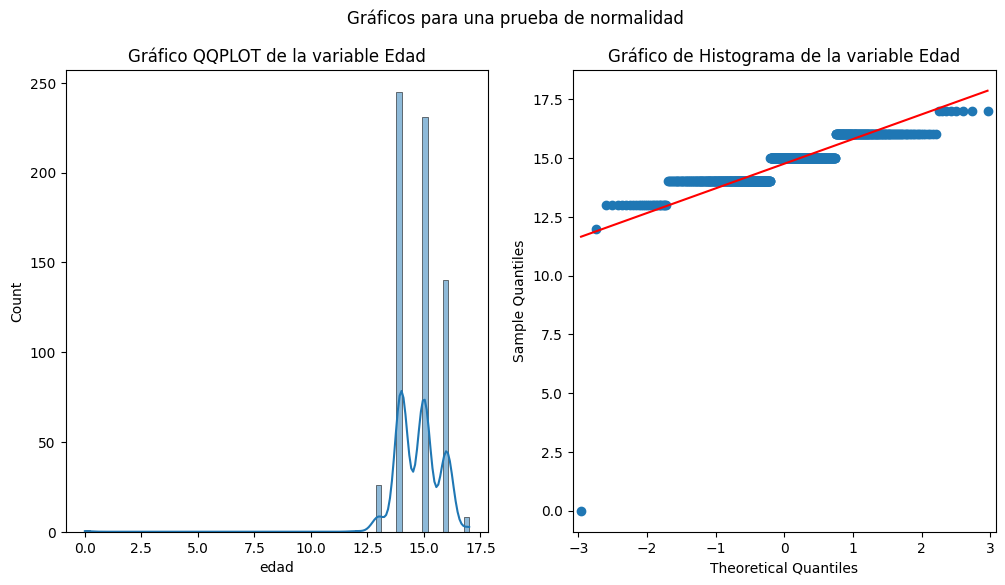

In [40]:
# Visualizamos un histograma de la edad
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')

axes[0].set_title('Gráfico QQPLOT de la variable Edad')
axes[1].set_title('Gráfico de Histograma de la variable Edad')

qqplot(df_nutricion['edad'] , line='s', ax=axes[1])
sns.histplot(x='edad', data=df_nutricion, ax=axes[0], kde= True)
plt.show()

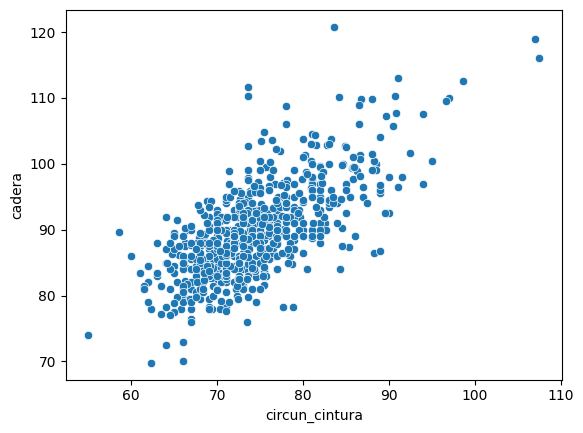

In [41]:
# Visualizamos un scatter plot de la relación entre la circunferencia de cintura y cadera
sns.scatterplot(data=df_nutricion, x="circun_cintura", y="cadera")
plt.show()

# Notebook 2

REALIZAR:
Aplicar Estadística Inferencial-Trabajar hasta con 5 variables(seleccionar las variables a preferencia).

Realizamos un análisis de correlación para determinar si existe una relación entre dos variables. Por ejemplo, podemos utilizar la función pearsonr de la librería scipy.stats para calcular el coeficiente de correlación de Pearson entre la circunferencia de cintura y la circunferencia de cadera:

In [42]:
# Cargamos Librerias
import scipy.stats as stats

In [45]:
df_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    float64
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

1. Prueba de Correlación

<Axes: >

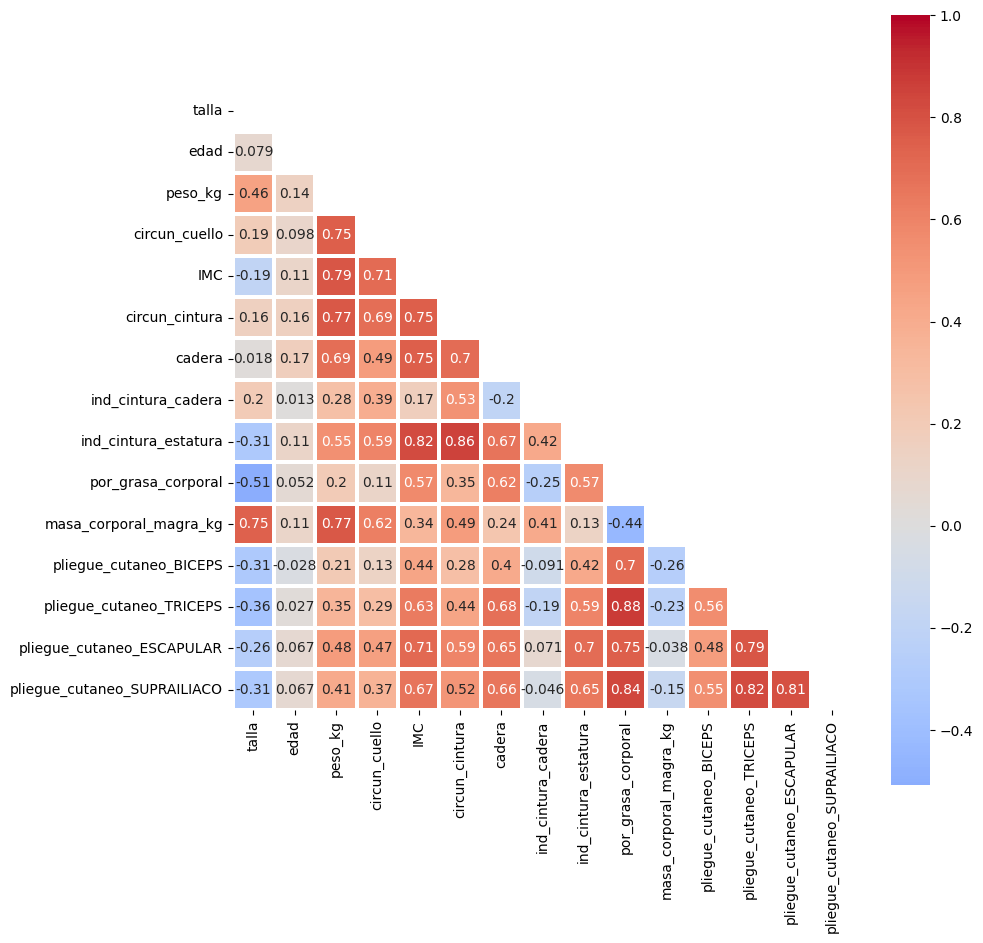

In [52]:
# Calculamos la correlación entre variables para ver si existe alguna relación entre ellas. 
# Podemos utilizar el método corr de Pandas para calcular la matriz de correlación y el método heatmap de Seaborn para visualizarla como un mapa de calor
variables_numericas = df_nutricion.select_dtypes(include=['float64', 'int64'])
correlacion = variables_numericas.corr()

mask = np.triu(np.ones_like(correlacion, dtype=bool ))
plt.figure(figsize=(10, 10)) # colocamos la base
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=1.5, mask = mask,  vmax=1, center = 0, 
            square = True)

Los valores de correlación cercanos a 1 se mostrarán en rojo, indicando una fuerte correlación positiva, mientras que los valores cercanos a -1 se mostrarán en azul, indicando una fuerte correlación negativa. Los valores cercanos a 0 se mostrarán en tonos más claros, indicando una correlación débil o nula.

2. Prueba de Correlación de Pearson

In [44]:
# Realizamos una prueba de correlación de Pearson
circunferencia_cintura = df_nutricion['circun_cintura']
circunferencia_cadera = df_nutricion['cadera']

corr, p = stats.pearsonr(circunferencia_cintura, circunferencia_cadera)

print('Prueba de Correlación de Pearson Corr=%.3f, valor p=%.3f' % (corr, p))

Prueba de Correlación de Pearson Corr=0.697, valor p=0.000


Si el valor de corr es cercano a 1, indica una correlación positiva fuerte entre las dos variables (es decir, a medida que aumenta la circunferencia de cintura, también aumenta la circunferencia de cadera). Si el valor de corr es cercano a -1, indica una correlación negativa fuerte (es decir, a medida que aumenta la circunferencia de cintura, disminuye la circunferencia de cadera). Si el valor de corr es cercano a 0, indica una correlación débil o inexistente. Además, el valor de p en 0 indica que no hay correlación entre las dos variables
************************************************************************

3. Prueba de Hipótesis: Ahora vamos a realizar una prueba de hipótesis y determinar si la media del IMC es diferente en dos grupos (por ejemplo, hombres y mujeres), utilizando la prueba t de Student.

Para esto, primero separamos los datos en dos grupos vamos a utilizar la variable de género que creamos. Luego, podemos usar la función ttest_ind de la librería scipy.stats para realizar la prueba t de Student y obtener el valor de p:

In [47]:
from scipy.stats import ttest_ind

#data_riesgo_f[data_riesgo_f['riesgo'] =="no riesgoso"]['score']

hombres = df_nutricion[df_nutricion['Genero'] == "Hombres"]['IMC']
mujeres = df_nutricion[df_nutricion['Genero'] == "Mujeres"]['IMC']

t, p = ttest_ind(hombres, mujeres)

print("Valor t: ", t)
print("Valor p: ", p)
#print(mujeres)
#print (hombres)

Valor t:  -1.1583028245732518
Valor p:  0.24716587725080588


El valor de p es mayor que nuestro nivel de significancia (0.05), podemos aceptar la hipótesis que las medias de IMC son iguales en ambos grupos.

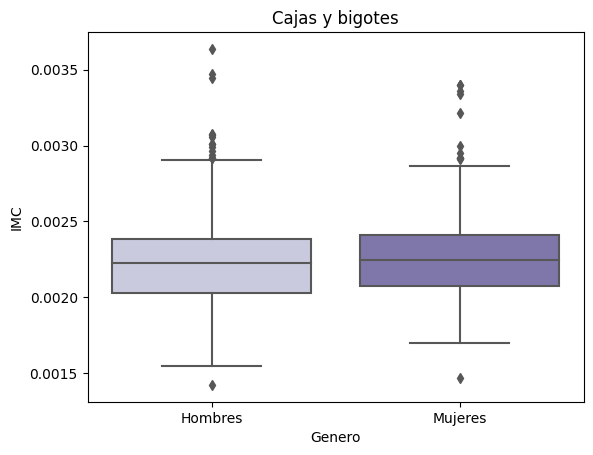

In [64]:
# Graficamos 

#df_nutricion.boxplot(column="IMC", by="Genero",figsize=(8,6))
#plt.show()

sns.boxplot(x="Genero", y="IMC", data=df_nutricion, palette = 'Purples')
plt.title('Cajas y bigotes')
plt.show()

4. Prueba de Hipótesis: Prueba de hipótesis para determinar si hay una diferencia significativa en la media de la edad entre dos grupos A y B.

In [55]:
from scipy.stats import ttest_ind

# Dividimos los datos en dos grupos según el género A Hombres, B mujeres
GrupoA = df_nutricion[df_nutricion["Grupos"] == "A"]["edad"]
GrupoB = df_nutricion[df_nutricion["Grupos"] == "B"]["edad"]

# Realizamos una prueba de hipótesis de dos muestras para determinar si hay una diferencia significativa en la media de la edad
t_stat, p_value = ttest_ind(GrupoA, GrupoB)

# Imprimimos el valor p para evaluar si la diferencia es significativa
print("Valor p: ", p_value)

Valor p:  1.3255364721985074e-67


La hipótesis nula sería que no hay diferencia significativa en la media de edad entre ambos grupos.

 En este caso, el valor p es extremadamente bajo (1.3255364721985074e-67), lo que indica que hay evidencia muy fuerte en contra de la hipótesis nula. Por lo tanto, se puede concluir que hay una diferencia significativa en la media de edad entre hombres y mujeres.

5. Prueba de Hipótesis: Prueba de hipótesis para determinar si hay una diferencia significativa en la proporción de personas con sobrepeso u obesidad entre dos grupos (por ejemplo, entre fumadores (Grupo A) y no fumadores (Grupo B).

In [56]:
from scipy.stats import chi2_contingency

# Creamos una tabla de contingencia con las frecuencias de sobrepeso/obesidad y fumadores/no fumadores
tabla = pd.crosstab(df_nutricion["IMC_clasificado"], df_nutricion["Grupos"])

# Realizamos una prueba de chi-cuadrado para determinar si hay una relación significativa entre las dos variables
chi2_stat, p_value, dof, expected = chi2_contingency(tabla)

# Imprimimos el valor p para evaluar si la diferencia es significativa
print("Valor p: ", p_value)

Valor p:  1.0


Este resultado nos indica que no hay evidencia estadística suficiente para rechazar la hipótesis nula.

La hipótesis nula en nuestro caso es que no hay diferencia significativa en la proporción de personas con sobrepeso u obesidad entre los dos grupos, mientras que la hipótesis alternativa es que sí hay una diferencia significativa.

El valor p representa la probabilidad de obtener un resultado igual o más extremo que el observado en una muestra, suponiendo que la hipótesis nula es verdadera. Si el valor p es menor que el nivel de significancia previamente establecido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que hay evidencia suficiente para afirmar que hay una diferencia significativa entre los dos grupos.

Pero en nuestro caso el valor p=1 sugiere que no hay evidencia suficiente para rechazar la hipótesis nula y que no hay una diferencia significativa en la proporción de personas con sobrepeso u obesidad entre fumadores y no fumadores.